### Análise de Polaridade
(comentários fb)

#### 1. <span style="color:#00b3b3">Instalação de pacotes</span>

In [4]:
if(!require('dplyr')) install.packages('dplyr')
if(!require('tidytext')) install.packages('tidytext')
if(!require('tidyverse')) install.packages('tidyverse')
if(!require('ggplot2')) install.packages('ggplot2') 
if(!require('lexiconPT')) install.packages('lexiconPT')
if(!require('wordcloud')) install.packages('wordcloud')
if(!require('ggthemes')) install.packages('ggthemes')
if(!require('igraph')) install.packages('igraph')
if(!require('ggraph')) install.packages('ggraph')
source("http://bioconductor.org/biocLite.R")
biocLite("limma")

Loading required package: tidytext
Loading required package: lexiconPT
Loading required package: ggraph
Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.3 (2019-03-11).
Installing package(s) ‘limma’
installation path not writeable, unable to update packages: boot, checkpoint,
  cluster, doParallel, foreign, iterators, jsonlite, MASS, Matrix, mgcv, nlme,
  R6, rpart, RUnit, survival, sys
Old packages: 'actuar', 'AER', 'aplpack', 'bayesm', 'blob', 'bnlearn', 'bold',
  'checkmate', 'classInt', 'coda', 'covr', 'coxme', 'crul', 'deldir',
  'deSolve', 'doSNOW', 'dplyr', 'DT', 'dtw', 'ellipsis', 'emmeans', 'fastICA',
  'fields', 'forecast', 'fpc', 'gam', 'ggmcmc', 'ggplot2', 'ggstance', 'haven',
  'hms', 'jomo', 'knitr', 'lava', 'lavaan', 'lpSolve', 'markdown', 'mclust',
  'mice', 'mlogit', 'mo

In [5]:
install.packages("tm", repos="http://R-Forge.R-project.org")

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)


#### 2. <span style="color:#00b3b3">Bibliotecas</span>

In [1]:
library(dplyr)
library(tidyverse)
library(tidytext) #Text mining
library(ggplot2) #Visualizations (also included in the tidyverse package)
library(lexiconPT)

library(tm)
# library(tmap)

library(readr)
library(stringr)
# library(tidyr) #Spread, separate, unite, text mining (also included in the tidyverse package)
library(reshape2)
# library(syuzhet)
library(ggthemes)
library(wordcloud)
library(limma)
library(igraph)      #ngram network diagrams
library(ggraph)      #ngram network diagrams
library(lexiconPT)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ ggplot2 3.2.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Loading required package: RColorBrewer

Attaching package: ‘igraph’

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:t

#### 3. <span style="color:#00b3b3">Carrega Dados</span>

In [2]:
# comments <- read.csv(file="comentarios.csv", header=TRUE, sep=",")
data = read.columns("comentarios.csv", c("post_text","comment_message"), sep = ",")
# comments
colnames(data)
lapply(data, head)

[1] "post_text"       "comment_message"

$post_text
[1] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[2] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[3] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[4] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[5] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
[6] "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"
359 Levels:  ??????????? ... BanrisulPrev

$comment_message
[1] "Orgulho de fazer parte disso!!@ melhor banco!!!"    
[2] "Melhor Banco!!"                                     
[3] "#Mpaef #ENEF Me poupe #vemprompaef #MePoupe  Boraa!"
[4] "MELHOR BANCO!"                                      
[5] 👏👏👏                                                  
[6] #VEMPROMPAEF                                         
3916 Levels:  , ;) :) :D ?? ... \U0001f970

#### 4. <span style="color:#00b3b3">Pré-processamento</span>

- Cria lista personalizada de *stopwords* em português

In [21]:
custom_stop_words <- tm::stopwords("portuguese")

# se necessitar adicionar stopwords específics, adicione abaixo:
custom_stop_words <- c(custom_stop_words, "banrisul", "é", "tá")

- Separa as sentenças em *tokens* e remove as *stopwords*

In [17]:
dfCorpus = Corpus(VectorSource(data$comment_message))

# Mostra informações gerais (p.ex., quantidade documentos criados)
dfCorpus 

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 4589

In [8]:
# elimina espaços em branco e tabulações extras
myCorpus <- tm_map(dfCorpus, stripWhitespace)
# inspect(myCorpus)  # descomente para ver o resultado da etapa

Warning message in tm_map.SimpleCorpus(dfCorpus, stripWhitespace):
“transformation drops documents”

In [14]:
myCorpus <- tm_map(myCorpus, content_transformer(tolower))
# inspect(myCorpus)  # descomente para ver o resultado da etapa

Warning message in tm_map.SimpleCorpus(myCorpus, content_transformer(tolower)):
“transformation drops documents”

In [15]:
myCorpus <- tm_map(myCorpus, removePunctuation)
# inspect(myCorpus)  # descomente para ver o resultado da etapa

Warning message in tm_map.SimpleCorpus(myCorpus, removePunctuation):
“transformation drops documents”

In [22]:
myCorpus <- tm_map(myCorpus, removeWords, custom_stop_words)
# inspect(myCorpus)  # descomente para ver o resultado da etapa

Warning message in tm_map.SimpleCorpus(myCorpus, removeWords, custom_stop_words):
“transformation drops documents”

In [23]:
# elimina variações morfológicas: 
# (nem sempre é útil. Tente comentar e ver se o resultado fica melhor...)
dictCorpus <- myCorpus # guarda versão original das palavras para uso mais adiante 
myCorpus <- tm_map(myCorpus, stemDocument, language="portuguese")

# inspect(myCorpus)  # descomente para ver o resultado da etapa

Warning message in tm_map.SimpleCorpus(myCorpus, stemDocument, language = "portuguese"):
“transformation drops documents”

In [ ]:
# identifica tokens:
myCorpusTokenized <- lapply(myCorpus, scan_tokenizer) 

# atualiza palavras stemizadas com as completas:
myTokensStemCompleted <- lapply(myCorpusTokenized, stemCompletion, dictCorpus) 

In [24]:
# cria dataframe (com 1 linha por documento/comentário):
comments_preprocessed <- data.frame(text = sapply(myTokensStemCompleted, paste, collapse = " "), stringsAsFactors = FALSE)

# comments_preprocessed # descomente para ver o resultado do dataframe

In [105]:
comments <- comments_preprocessed
# comments

In [106]:
# define as_data_frame como sendo apenas da biblioteca dplyr
as_data_frame <- dplyr::as_data_frame

In [107]:
comments <- comments %>% map_if(is.factor, as.character) %>% as_data_frame 
tidy_comments <- comments %>%
  unnest_tokens(word, text) #%>%
comments
# tidy_comments

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1    orgulha faz parte disse melhor banca                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
2    melhor banca                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
3    mpaef enef poupança vemprompaef mepoupe bora                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
4    melhor banca                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [108]:
# carrega léxicos
data("oplexicon_v3.0")
data("sentiLex_lem_PT02")

op30 <- oplexicon_v3.0
sent <- sentiLex_lem_PT02

colnames(op30) <- c("word", "type", "sentiment", "polarity_revision")

op30 <- data.frame(lapply(op30, function(x) {
                  gsub("-1", "negativo", x)
              }))

op30 <- data.frame(lapply(op30, function(x) {
                  gsub("1", "positivo", x)
              }))

op30 <- data.frame(lapply(op30, function(x) {
                  gsub("0", "neutro", x)
              }))

op30 %>% select(word, sentiment)

# as_tibble(op30)
op30
tibbleop30 <- as_tibble(op30)

word         sentiment
1     =[           negativo 
2     =@           negativo 
3     =p           negativo 
4     =P           negativo 
5     =x           negativo 
6     =d           positivo 
7     =D           positivo 
8     ;)           positivo 
9     ;)           positivo 
10    ;@           negativo 
11    ;*           negativo 
12    ;**          negativo 
13    ;~           negativo 
14    ;D           negativo 
15    ;D           negativo 
16    ;p           negativo 
17    ;P           negativo 
18    ;p           negativo 
19    ;x           negativo 
20    ;xx          negativo 
21    :'(          negativo 
22    :')          negativo 
23    :(           negativo 
24    :(           negativo 
25    :)           positivo 
26    :)           positivo 
27    :)))         positivo 
28    :]           negativo 
29    :@           neutro   
30    :@           neutro   
⋮     ⋮            ⋮        
32162 zen          positivo 
32163 zerar        negativo 
32164 ziguezaguear positivo 
32165 zimbrar      neutro   
32166 zingrar      positivo 
32167 zinir        positivo 
32168 zombar       positivo 
32169 zombetear    positivo 
32170 zombeteira   negativo 
32171 zombeteiras  negativo 
32172 zombeteiro   negativo 
32173 zombeteiros  negativo 
32174 zonza        negativo 
32175 zonzar       positivo 
32176 zonzas       negativo 
32177 zonzear      positivo 
32178 zonzo        negativo 
32179 zonzos       negativo 
32180 zorragar     neutro   
32181 zote         negativo 
32182 zotes        negativo 
32183 zuir         positivo 
32184 zumbidor     negativo 
32185 zumbidora    negativo 
32186 zumbidoras   negativo 
32187 zumbidores   negativo 
32188 zumbir       positivo 
32189 zunir        positivo 
32190 zupar        negativo 
32191 zurzir       negativo

word         type sentiment polarity_revision
1     =[           emot negativo  A                
2     =@           emot negativo  A                
3     =p           emot negativo  A                
4     =P           emot negativo  A                
5     =x           emot negativo  A                
6     =d           emot positivo  A                
7     =D           emot positivo  A                
8     ;)           emot positivo  A                
9     ;)           emot positivo  A                
10    ;@           emot negativo  A                
11    ;*           emot negativo  A                
12    ;**          emot negativo  A                
13    ;~           emot negativo  A                
14    ;D           emot negativo  A                
15    ;D           emot negativo  A                
16    ;p           emot negativo  A                
17    ;P           emot negativo  A                
18    ;p           emot negativo  A                
19    ;x           emot negativo  A                
20    ;xx          emot negativo  A                
21    :'(          emot negativo  A                
22    :')          emot negativo  A                
23    :(           emot negativo  A                
24    :(           emot negativo  A                
25    :)           emot positivo  A                
26    :)           emot positivo  A                
27    :)))         emot positivo  A                
28    :]           emot negativo  A                
29    :@           emot neutro    A                
30    :@           emot neutro    A                
⋮     ⋮            ⋮    ⋮         ⋮                
32162 zen          adj  positivo  A                
32163 zerar        vb   negativo  A                
32164 ziguezaguear vb   positivo  A                
32165 zimbrar      vb   neutro    A                
32166 zingrar      vb   positivo  A                
32167 zinir        vb   positivo  A                
32168 zombar       vb   positivo  A                
32169 zombetear    vb   positivo  A                
32170 zombeteira   adj  negativo  A                
32171 zombeteiras  adj  negativo  A                
32172 zombeteiro   adj  negativo  A                
32173 zombeteiros  adj  negativo  A                
32174 zonza        adj  negativo  A                
32175 zonzar       vb   positivo  A                
32176 zonzas       adj  negativo  A                
32177 zonzear      vb   positivo  A                
32178 zonzo        adj  negativo  A                
32179 zonzos       adj  negativo  A                
32180 zorragar     vb   neutro    A                
32181 zote         adj  negativo  A                
32182 zotes        adj  negativo  A                
32183 zuir         vb   positivo  A                
32184 zumbidor     adj  negativo  A                
32185 zumbidora    adj  negativo  A                
32186 zumbidoras   adj  negativo  A                
32187 zumbidores   adj  negativo  A                
32188 zumbir       vb   positivo  A                
32189 zunir        vb   positivo  A                
32190 zupar        vb   negativo  A                
32191 zurzir       vb   negativo  A

In [109]:
word_counts <- tidy_comments %>%
  inner_join(op30) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()
# word_counts

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

In [110]:
# contagem de frequencias
# tidy_comments %>%
#   count(word, sort = TRUE)

word                     n  
1    dia                      451
2    parabéns                 426
3    bom                      383
4    inbox                    352
5    obriga                   333
6    banca                    330
7    agência                  268
8    chama                    254
9    pode                     244
10   olá                      238
11   informa                  213
12   toda                     210
13   boa                      204
14   faz                      201
15   conta                    190
16   atende                   175
17   pra                      155
18   tarde                    150
19   cartão                   134
20   cliente                  133
21   ser                      133
22   mãe                      125
23   sempre                   120
24   amo                      116
25   exemplar                 116
26   parte                    116
27   sabe                     110
28   precisa                  109
29   fica                     107
30   quer                     107
⋮    ⋮                        ⋮  
5041 wwwmeubanricomprascombr  1  
5042 wwwnetshoescombrbanrisul 1  
5043 x                        1  
5044 xingar                   1  
5045 xx1130030511             1  
5046 xx1135048357             1  
5047 yana                     1  
5048 yuri                     1  
5049 zaira                    1  
5050 zambão                   1  
5051 zanchet                  1  
5052 zanette                  1  
5053 zanoni                   1  
5054 zap                      1  
5055 zapalai                  1  
5056 zardo                    1  
5057 zé                       1  
5058 zeferi                   1  
5059 zeferina                 1  
5060 zelomar                  1  
5061 zenaidi                  1  
5062 zenilde                  1  
5063 zenita                   1  
5064 zilda                    1  
5065 zilio                    1  
5066 zilma                    1  
5067 zinski                   1  
5068 zoe                      1  
5069 zona                     1  
5070 zorzan                   1

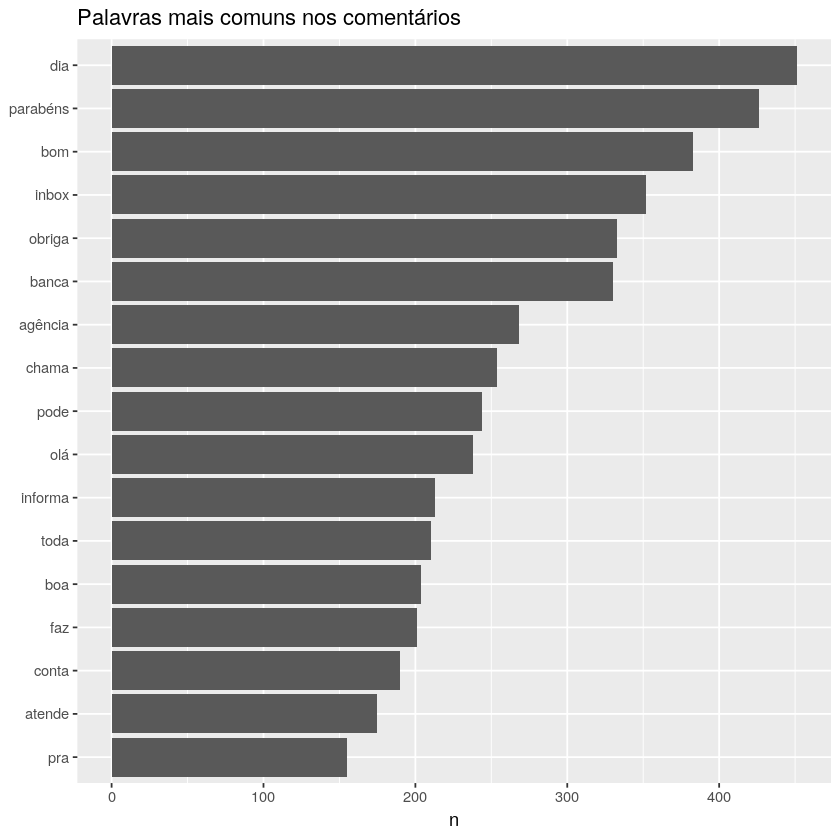

In [111]:
tidy_comments %>%
  count(word, sort = TRUE) %>%
  filter(n > 150) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() + ggtitle("Palavras mais comuns nos comentários")

## **4.** Polaridade Geral

In [112]:
# as_tibble(op30)

word_counts <- tidy_comments %>%
  inner_join(tibbleop30) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()
word_counts

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

word        sentiment n  
1   bom         positivo  383
2   boa         positivo  204
3   ser         positivo  133
4   exemplar    neutro    116
5   exemplar    positivo  116
6   sabe        positivo  110
7   precisa     positivo  109
8   melhor      positivo   93
9   grande      neutro     89
10  ter         neutro     89
11  solicita    positivo   81
12  nada        neutro     80
13  encaminhada positivo   75
14  nova        positivo   74
15  ver         positivo   63
16  feliz       positivo   61
17  segura      positivo   61
18  passa       negativo   60
19  gerente     neutro     56
20  baixa       neutro     51
21  santa       positivo   51
22  digital     neutro     47
23  filha       neutro     45
24  legal       positivo   45
25  abrir       negativo   39
26  amiga       positivo   39
27  ana         negativo   39
28  linda       positivo   39
29  privada     neutro     37
30  central     neutro     36
⋮   ⋮           ⋮         ⋮  
509 reaver      neutro    1  
510 reembolsar  positivo  1  
511 regressiva  negativo  1  
512 repleto     positivo  1  
513 resfriar    positivo  1  
514 ressarcir   positivo  1  
515 restrito    neutro    1  
516 revigorada  positivo  1  
517 sa          positivo  1  
518 seguidores  positivo  1  
519 seletivo    neutro    1  
520 semelhante  neutro    1  
521 serio       neutro    1  
522 sombrio     negativo  1  
523 submeter    neutro    1  
524 subtil      neutro    1  
525 tarouco     negativo  1  
526 testemunhar neutro    1  
527 ultima      neutro    1  
528 ultrajante  negativo  1  
529 unida       negativo  1  
530 usado       negativo  1  
531 uteis       positivo  1  
532 util        positivo  1  
533 vera        positivo  1  
534 vermelho    neutro    1  
535 vertiginosa negativo  1  
536 videira     neutro    1  
537 vizinhos    neutro    1  
538 xingar      positivo  1

In [114]:
# usar funçao do tidytext para criar uma linha para cada palavra de um comentario
df_comments_unnested <- comments %>% unnest_tokens(word, text)
# df_comments_unnested

In [115]:
df_comments_unnested %>% 
  left_join(op30) %>% 
  select(word, sentiment) #%>% 
#   head(10)

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

word                 sentiment
1     orgulha              NA       
2     faz                  NA       
3     parte                NA       
4     disse                NA       
5     melhor               positivo 
6     banca                NA       
7     melhor               positivo 
8     banca                NA       
9     mpaef                NA       
10    enef                 NA       
11    poupança             NA       
12    vemprompaef          NA       
13    mepoupe              NA       
14    bora                 NA       
15    melhor               positivo 
16    banca                NA       
17    vemprompaef          NA       
18    amo                  NA       
19    nathalia             NA       
20    arcuri               NA       
21    parabéns             NA       
22    niressa              NA       
23    leite                NA       
24    santa                positivo 
25    banca                NA       
26    altair               NA       
27    burocratico          positivo 
28    cheia                neutro   
29    cabides              NA       
30    empregador           NA       
⋮     ⋮                    ⋮        
30618 bom                  positivo 
30619 dia                  NA       
30620 roberta              negativo 
30621 pode                 NA       
30622 verifica             NA       
30623 possibilidade        NA       
30624 liga                 NA       
30625 bem                  NA       
30626 promotora            NA       
30627 associada            negativo 
30628 crédito              NA       
30629 consignado           NA       
30630 meia                 neutro   
30631 telefona             NA       
30632 site                 NA       
30633 wwwbempromotoracombr NA       
30634 consiga              NA       
30635 inss                 NA       
30636 parcela              NA       
30637 60200reais           NA       
30638 ja                   NA       
30639 pague                NA       
30640 11                   NA       
30641 parcela              NA       
30642 possa                NA       
30643 refinanciamento      NA       
30644 agrega               NA       
30645 nova                 positivo 
30646 aumentado            NA       
30647 inss                 NA

Selecting by n


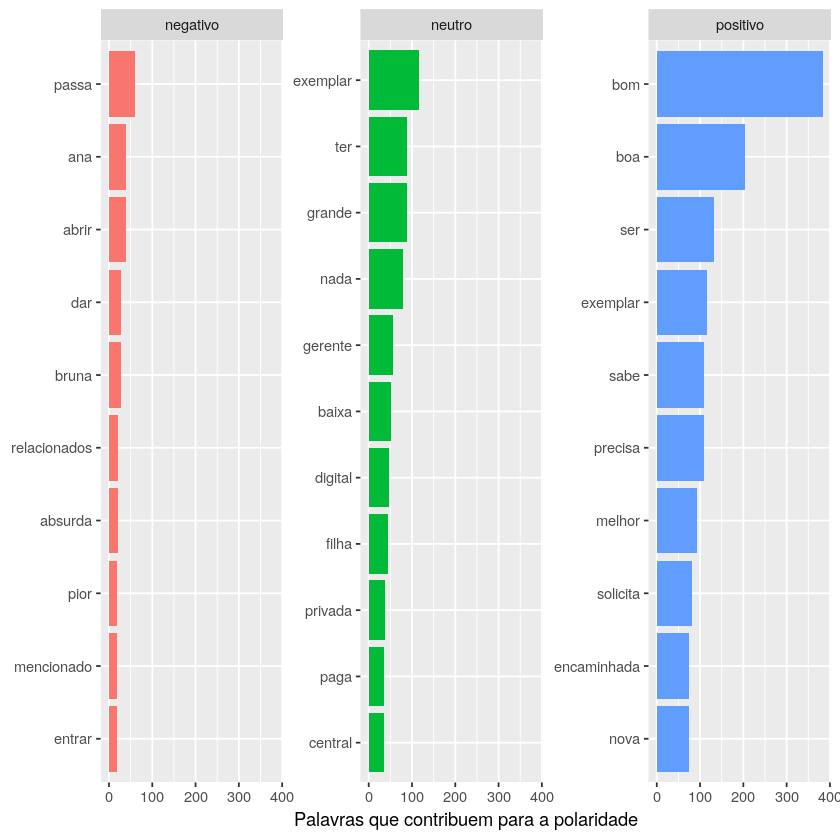

In [116]:
idk <- word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n))

idk%>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Palavras que contribuem para a polaridade",
       x = NULL) +
  coord_flip()

# idk

Joining, by = "word"


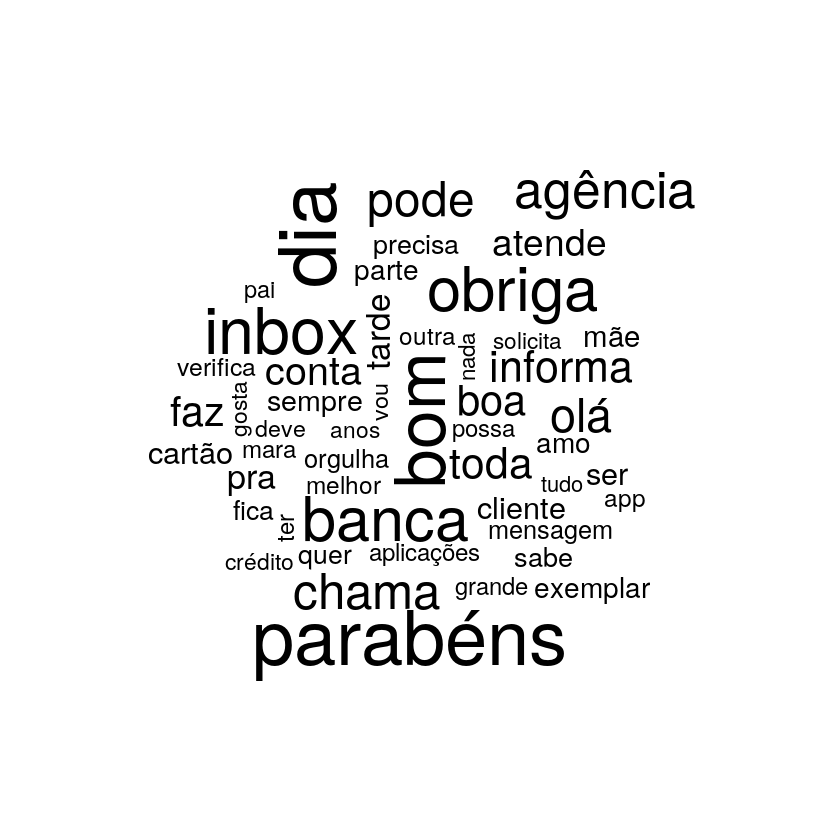

In [117]:
tidy_comments%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 50))

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

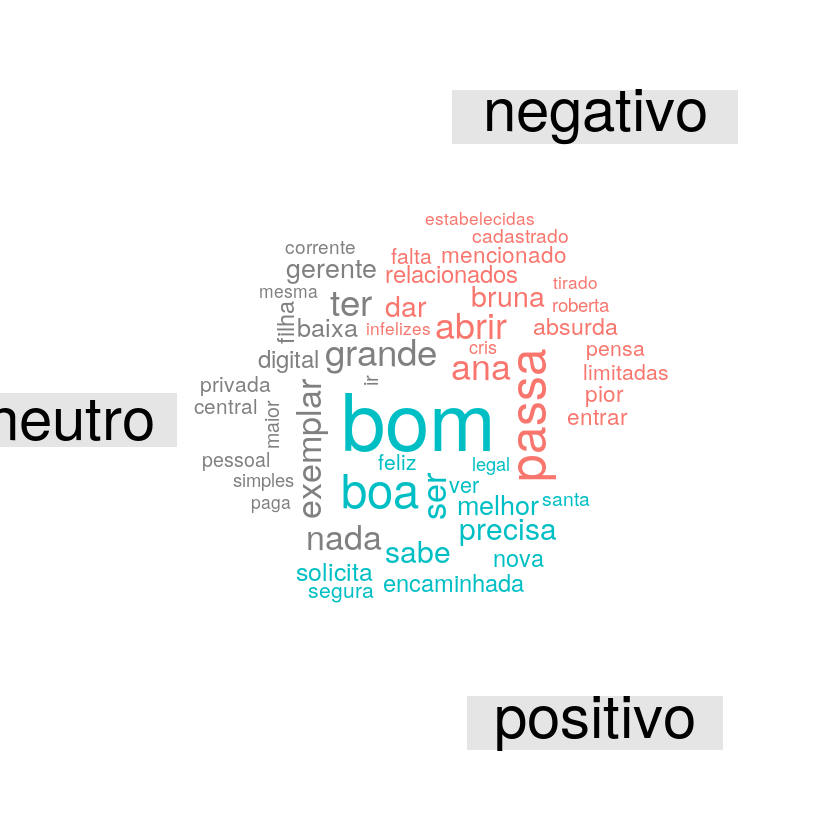

In [118]:
# cria uma wordcloud de palavras positivas (azul) vs negativas (vermelhas) vs neutras (cinza)

tidy_comments %>%
  inner_join(op30) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#808080","#00BFC4"),
                   max.words = 50)


Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”

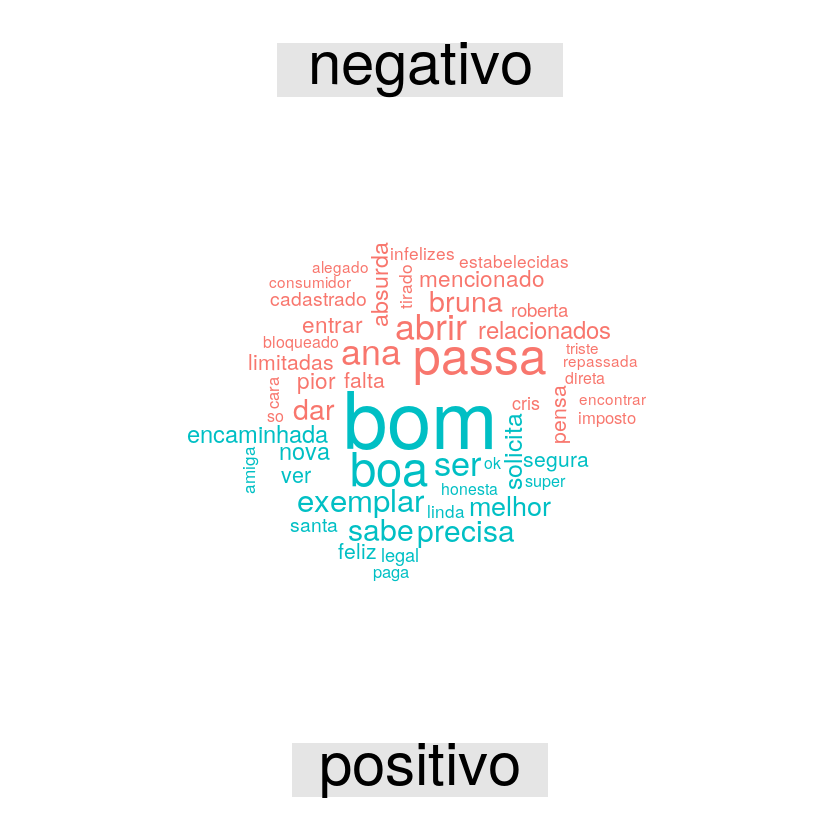

In [57]:
# mesma coisa que a célula anterior porém desconsiderando a categoria "neutro
# cria uma wordcloud de palavras positivas (azul) vs negativas (vermelhas)
tidy_comments %>%
  inner_join(op30 %>% filter(sentiment!="neutro")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 50)

### Relações entre palavras (Geral)

In [119]:
comments_bigrams <- comments %>%
  unnest_tokens(bigram, text, token = "ngrams", n = 2)
# comments_bigrams

In [120]:
bigrams_separated <- comments_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)
# bigram_counts

In [121]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")
# bigrams_united

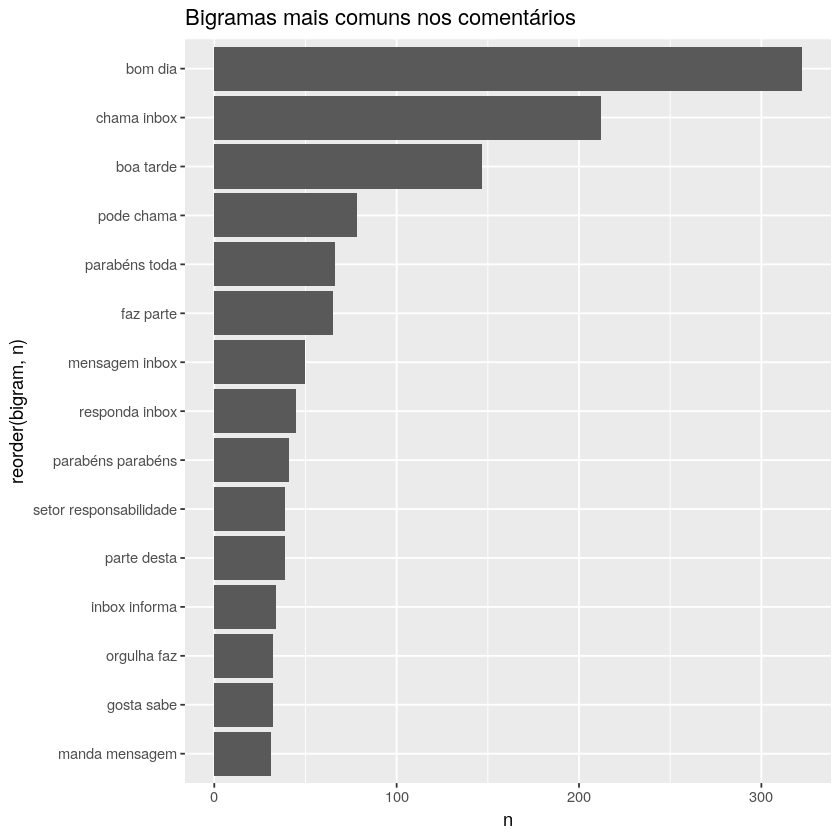

In [122]:
bigram_tf_idf <- bigrams_united %>%
  count(bigram)
bigram_tf_idf <- bigram_tf_idf %>% filter(n>30)
ggplot(aes(x = reorder(bigram, n), y=n), data=bigram_tf_idf) + geom_bar(stat = 'identity') + ggtitle("Bigramas mais comuns nos comentários") + coord_flip()

In [123]:
bigram_graph <- bigram_counts %>%
  filter(n > 20) %>%
  graph_from_data_frame()
# bigram_graph

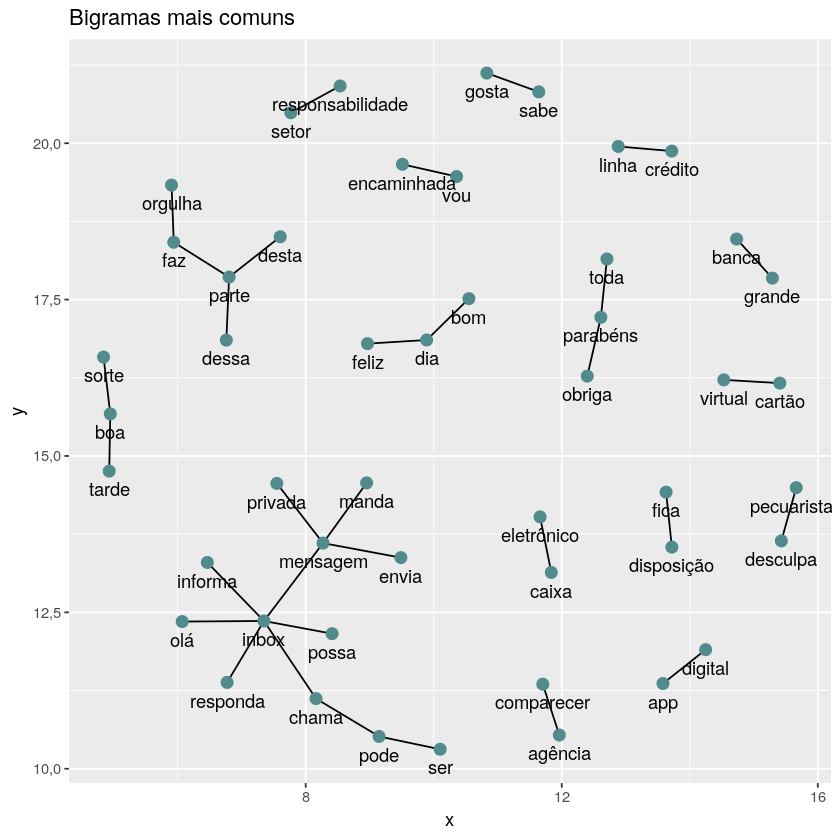

In [124]:
set.seed(2019)
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point(color = "darkslategray4", size = 3) +
  geom_node_text(aes(label = name), vjust = 1.8) + ggtitle("Bigramas mais comuns")

In [218]:
df <- cbind(data,comments)
df

post_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
2    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
3    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
4    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
5    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
6    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanh

## Polaridade por Postagem

In [222]:
# group_by(df, by="post_text")
# df$group_id <- df %>% group_indices(post_text) 
df <- df %>% 
    mutate(group_id = group_indices(., post_text))
df$pos<- NA
df$neg<- NA
# df

post_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
2    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
3    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
4    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
5    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                         
6    "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanh

In [226]:
# iterate over group
for(i in unique(df$group_id)){
  
    #new_df <- df[df$group_id == i]
    comments2 <- subset.data.frame(df, group_id== i)
    comments2 <- data.frame(comments2$text)
    comments2 <- comments2 %>% map_if(is.factor, as.character) %>% as_data_frame 
#     print(comments2)
   
    tidy_df <- comments2 %>%
        unnest_tokens(word, comments2.text) 
   
    word_counts <- tidy_df %>%
        inner_join(tibbleop30) %>%
        count(word, sentiment, sort = TRUE) %>%
        ungroup()

    df_comments_unnested <- comments2 %>% unnest_tokens(word, comments2.text)

        
    # df_comments_unnested %>%  left_join(op30) %>% select(word, sentiment)

    
    pos_pol <- df_comments_unnested %>%  left_join(op30) %>% select(word, sentiment) %>% filter(sentiment=="positivo") 
    n_pos <- nrow(data.frame(pos_pol))
    df$pos[df$group_id == i] <- n_pos
    
    neg_pol <- df_comments_unnested %>%  left_join(op30) %>% select(word, sentiment) %>% filter(sentiment=="negativo") 
    n_neg <- nrow(data.frame(neg_pol))
    df$neg[df$group_id == i] <- n_neg
}
# tidy_df
# comments

Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Warning message:
“Factor `sentiment` contains implicit NA, consider using `forcats::fct_explicit_na`”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word`

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` 

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` 

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Warning message:
“Factor `sentiment` contains implicit NA, consider us

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Warning message:
“Factor `sentiment` contains implicit NA, consider using `forcats::fct_explicit_na`”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, 

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Warning message:
“Factor `sentiment` contains implicit NA, consider using `forcats::fct_explicit_na`”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, 

“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Joining, by = "word"
Warning message:
“Column `word` joining character vector and factor, coercing into character vector”Warning message:
“Factor `sentiment` contains implicit NA, consider us

In [228]:
# distinct
tmp <- df %>% 
    distinct(group_id, .keep_all = T)

tmp

post_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1   "Mais uma vez  o Banrisul é o banco mais lembrado pelos gaúchos  de acordo com a pesquisa Top of Mind da Revista Amanhã. 👏👏👏  Permanecer na liderança é resultado da inovação constante e da dedicação ao buscar as melhores soluções em atendimento  produtos e serviços para quem mais importa: você  cliente. 😃  Grupo Amanhã #top19"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2   "Nathaliaarcuri chama o Banrisul para o #vemprompaef"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

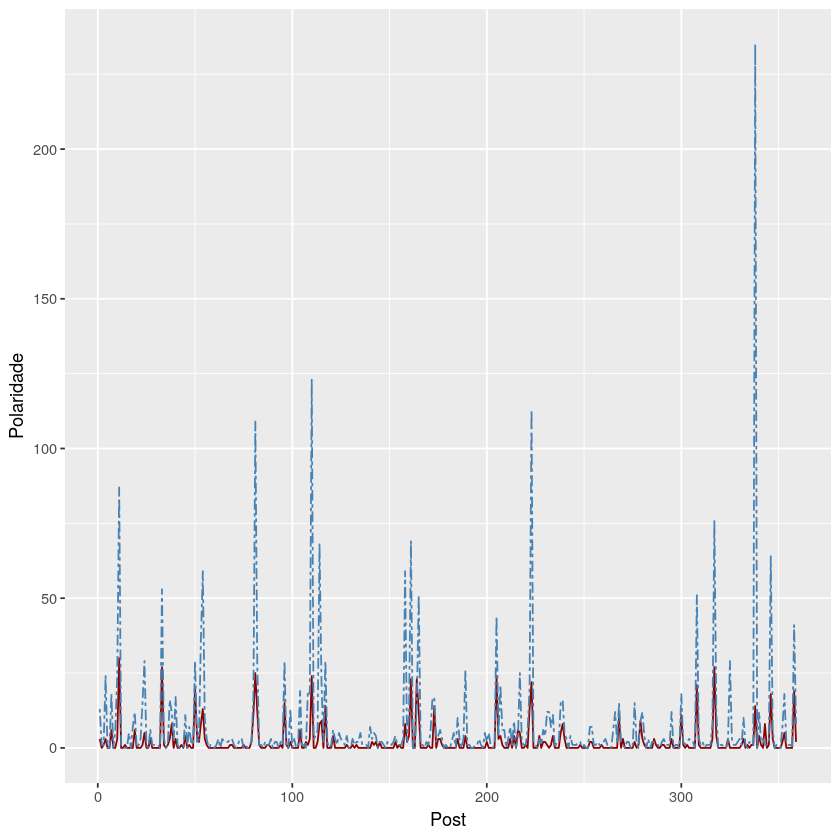

In [229]:
p <- ggplot(tmp, aes(x=group_id)) + 
      geom_line(aes(y = neg), color = "darkred") + 
      geom_line(aes(y = pos), color="steelblue", linetype="twodash") 
p + labs(x="Post",y="Polaridade",fill = "Polaridade")